## Problem set 2

### Problem 0 

-2 points for every missing green OK sign. If you don't run the cell below, that's -14 points.

Make sure you are in the DATA1030 environment.

In [2]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.11.4"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.11"):
    print(FAIL, "Python version 3.11 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "1.24.4", 'matplotlib': "3.7.2",'sklearn': "1.3.0", 
                'pandas': "2.0.3",'xgboost': "1.7.6", 'shap': "0.42.1", 'seaborn': "0.12.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.11.4

[ OK ] numpy version 1.24.4 is installed.
[ OK ] matplotlib version 3.7.2 is installed.
[ OK ] sklearn version 1.3.0 is installed.
[ OK ] pandas version 2.0.3 is installed.
[ OK ] xgboost version 1.7.6 is installed.
[ OK ] shap version 0.42.1 is installed.
[ OK ] seaborn version 0.12.2 is installed.


### Problem 1

One of the datasets we will be working with this semester is the kaggle house price dataset. The goal of this problem set is to use this dataset to practice dataframe manipulations and perform EDA.

Carefully read the description of the dataset which is located in the `data` folder. This is a very well documented dataset. Whenever you work with a dataset, it is highly recommended that you prepare a similar description if it is not readily available. Specific things to note:

- each feature is described in full detail,
- the meaning of continuous features is explained and their unit is provided (e.g., lot size is measured in square feet),
- each category in a categorical or ordinal feature is spelled out and explained.

### Problem 1a: Read in the data (5 points)

The kaggle house price dataset is located in the `data` folder. 

First, read the data into a pandas data frame and display the data frame below. You might encounter error messages and other issues along the way. Please diagnose and resolve them. 


In [1]:
# your code here 

In [2]:
import pandas as pd

In [5]:
pip install openpyxl

  Using cached openpyxl-3.1.2-py2.py3-none-any.whl (249 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
df = pd.read_excel("/Users/apple/Desktop/Data 1030/github-classroom-Data1030-Xiner Zhao/ps2-eda-XXXXiner/data/train.xlsx", sheet_name="data")
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Problem 1b: dataframe filtering

Answer the following data filtering related questions. 

Please make it easy for the TAs to grade your solution so print no more and no less than the necessary info. For example, if we ask how many columns there are in the dataset, print out that one number instead of the full shape of the data frame.

**Q1** When you buy a house, a surprising amount of time is spent assessing the basement. List the names of the basement-related features! How many basement-related features are there? (2 points)

In [4]:
# your code here 
columns = df.columns
print(columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

After we print all the name of columns in dataframe, we found that the keyword of basement-related feature is 'Bsmt', so we need to find out which columns contain the key word 'Bsmt'. Then we have the code below:

In [5]:
keyword = 'Bsmt'
selected_columns = [col for col in columns if keyword in col]
print('The names of the basement-related features are: \n',selected_columns)
print('The quantity of basement-related features is:',len(selected_columns))

The names of the basement-related features are: 
 ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath']
The quantity of basement-related features is: 11


**Q2** How many houses have an excellent overall quality? (1 point)

In [6]:
# your code here
print(df['OverallQual'].head())

0    7
1    6
2    7
3    7
4    8
Name: OverallQual, dtype: int64


We can find the variable 'OverallQual' is in integer format and it is not in a string format, so we need to check the description of the dataset and find which number means 'Excellent'.
We can find that 9 means excellent from data description. Then we have the code below:

In [7]:
df_OverallQual_Excellent = df[df['OverallQual'] == 9]
print('The quantity of houses which have an excellent overall quality is:',df_OverallQual_Excellent.shape[0])

The quantity of houses which have an excellent overall quality is: 43


**Q3** How many houses were built on or before the year 2000? (1 point)

In [8]:
# your code here
print(df['YearBuilt'].head())

0    2003
1    1976
2    2001
3    1915
4    2000
Name: YearBuilt, dtype: int64


In [9]:
df_YearBuilt_2000 = df[df['YearBuilt'] <= 2000]
print('The quantity of houses which were built on or before the year 2000 is:',df_YearBuilt_2000.shape[0])

The quantity of houses which were built on or before the year 2000 is: 1096


**Q4** How many houses have a pool and central airconditioning? (2 points)

In [10]:
# your code here
print(df['CentralAir'].head())
print(df['PoolArea'].head())

0    Y
1    Y
2    Y
3    Y
4    Y
Name: CentralAir, dtype: object
0    0
1    0
2    0
3    0
4    0
Name: PoolArea, dtype: int64


In [11]:
df_Pool_AirCon = df[(df['CentralAir'] == 'Y') & (df['PoolArea'] > 0)]
print('The quantity of houses which have a pool and central airconditioning is:',df_Pool_AirCon.shape[0])

The quantity of houses which have a pool and central airconditioning is: 7


### Problem 2a: EDA

Answer the following EDA related questions. 

The sequence of questions here are typical things to ask when you perform EDA on a new dataset. First you always want to know how many data points and features you have, and whether they are continuous or categorical. You should then take a closer look at the target variable. We will study the properties of the features and the relationships between the features and the target variable in 2b.

**Q1** How many rows and columns do we have in the dataframe? (2 point)

In [12]:
# your code here
print('The quantity of row in dataframe is:',df.shape[0])
print('The quantity of column in dataframe is:',df.shape[1])

The quantity of row in dataframe is: 1460
The quantity of column in dataframe is: 80


**Q2** What are the data types of the columns? Make sure that the output is not truncated and you see the type of each column. (2 points)

In [14]:
# your code here
pd.set_option('display.max_columns', None) # In order to display all output
pd.set_option('display.max_rows', None) # In order to display all output
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [15]:
pd.reset_option("display.max_columns") # Restore the setting
pd.reset_option("display.max_rows") # Restore the setting

**Q3** The ML target variable in this dataset is the sale price. We will develop ML pipelines to predict this variable based on the other features.

Is this column continuous or categorical? Please use .describe or .value_counts to take a quick look at this feature. (2 points)

In [16]:
# your code here
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

From the output, we can find that the sale price is continuous.

**Q4** Visualize the target variable. Don't forget the axis labels and graph title. Make sure to use appropriate arguments to best display the data. (4 points)

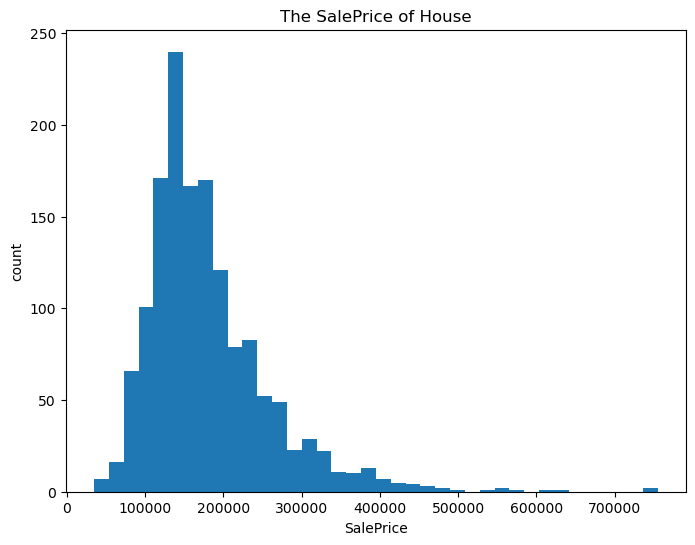

In [17]:
# your code here
import numpy as np
import matplotlib
from matplotlib import pylab as plt
plt.figure(figsize=(8,6))
df['SalePrice'].plot.hist(bins = int(np.sqrt(df.shape[0])))
plt.xlabel('SalePrice')
plt.ylabel('count')
plt.title('The SalePrice of House')
plt.show()


### Problem 2b: visualization (15 points)

Find one continuous, one ordinal, and one categorical feature that strongly correlates with the sale price. Create figures that illustrate your selected features and the sale price.

Don't forget to add axis labels and titles, and find apropriate arguments. Write figure captions to explain what the figure shows.

We will cover techniques in a week or two to quantitatively assess how strongly each feature correlates with the target variable. For now, we do a qualitative/visual assessment.

In [26]:
# your code here 
# (1) Continuous Feature 'GrLivArea' VS continuous feature 'SalePrice' (GrLivArea: Above grade (ground) living area square feet)
df['GrLivArea'].describe()

count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64

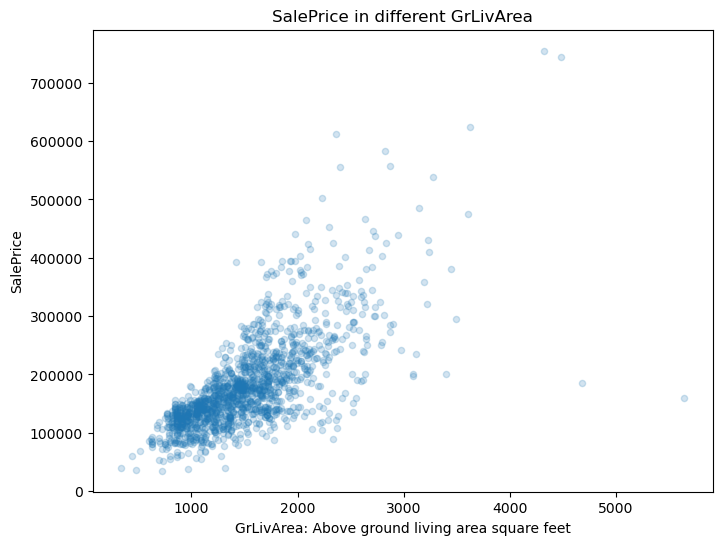

In [27]:
df.plot.scatter('GrLivArea','SalePrice',figsize=(8,6),alpha=0.2,s=20)
plt.xlabel('GrLivArea: Above ground living area square feet')
plt.ylabel('SalePrice')
plt.title('SalePrice in different GrLivArea')
plt.show()

The figure shows how the sale price of a house changes when its above ground living area changes.

In [42]:
# (2) Ordinal Feature 'GarageFinish' VS continuous feature 'SalePrice' (GarageFinish: Interior finish of the garage)
df['GarageFinish'].value_counts()

GarageFinish
Unf    605
RFn    422
Fin    352
Name: count, dtype: int64

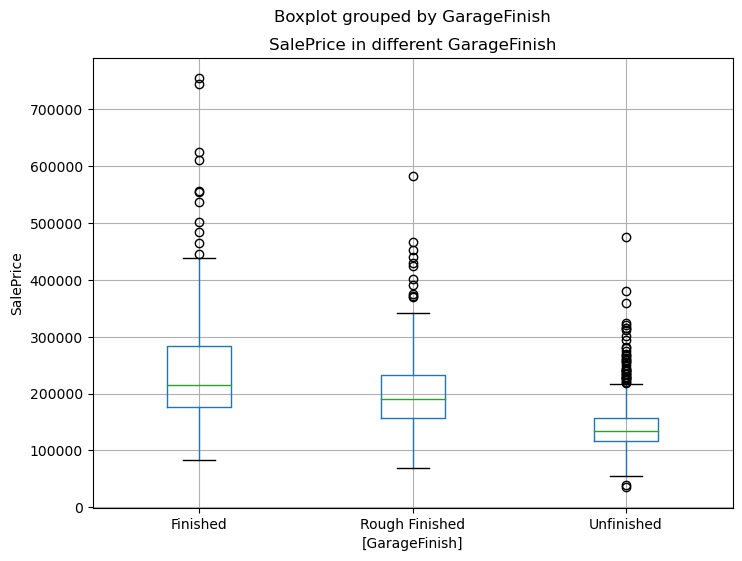

In [43]:
df[['SalePrice','GarageFinish']].boxplot(by='GarageFinish',figsize=(8,6))
plt.ylabel('SalePrice')
plt.xticks([1,2,3],['Finished','Rough Finished','Unfinished'])
plt.title('SalePrice in different GarageFinish')
plt.show()

The figure shows how the sale price of a house changes when its garage is finished, rough finished or unfinished.

In [44]:
# (3) Categorical feature 'GarageType' VS continuous feature 'SalePrice' (GarageType: Garage location)
df['GarageType'].value_counts()

GarageType
Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: count, dtype: int64

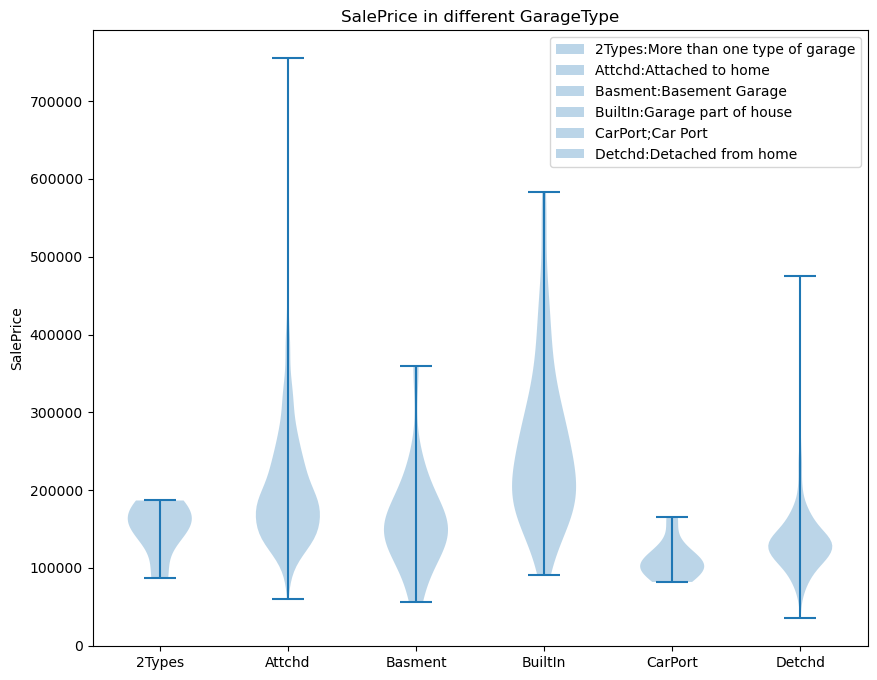

In [81]:
dataset = [df[df['GarageType']=='2Types']['SalePrice'].values,
           df[df['GarageType']=='Attchd']['SalePrice'].values,
           df[df['GarageType']=='Basment']['SalePrice'].values,
           df[df['GarageType']=='BuiltIn']['SalePrice'].values,
           df[df['GarageType']=='CarPort']['SalePrice'].values,
           df[df['GarageType']=='Detchd']['SalePrice'].values]

plt.figure(figsize=(10,8))
plt.violinplot(dataset = dataset)
plt.xticks([1,2,3,4,5,6],['2Types','Attchd','Basment','BuiltIn','CarPort','Detchd'])
plt.ylabel('SalePrice')
plt.legend(['2Types:More than one type of garage','Attchd:Attached to home','Basment:Basement Garage','BuiltIn:Garage part of house','CarPort;Car Port','Detchd:Detached from home'])
plt.title('SalePrice in different GarageType')
plt.show()

The figure shows how the sale price of a house changes when its type of garage changes.